# LangChain & Ziliz PDF Querying on UnData

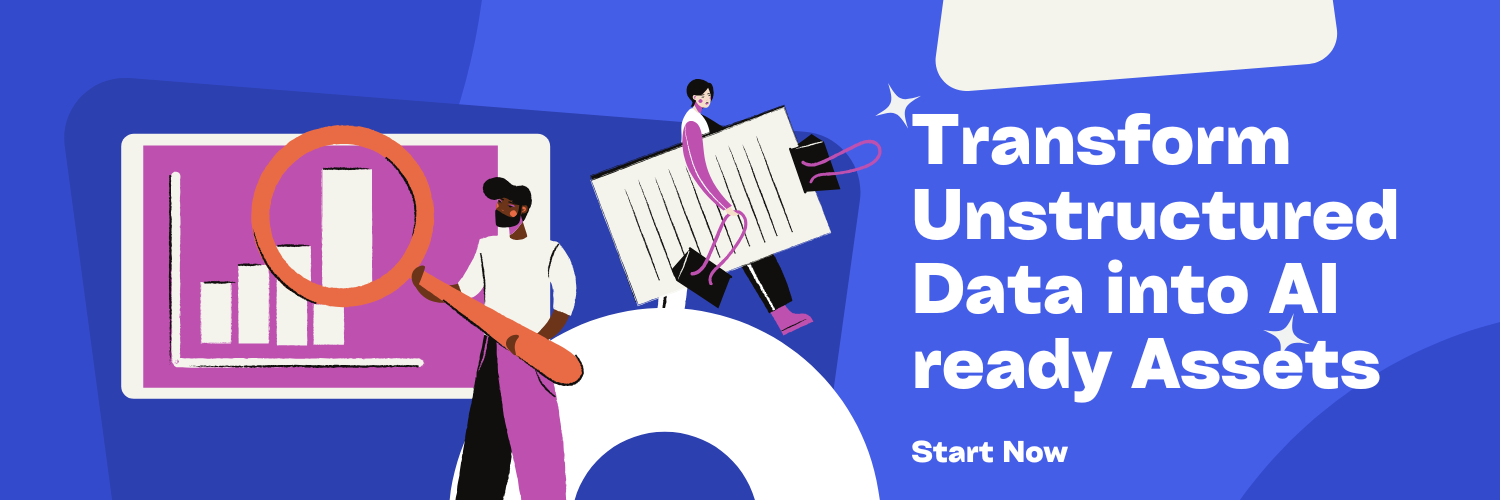

_By stay, Tech Enthusiast @Undatasio_

🚀 **Let's begin this example.**
- - -

#### This example demonstrates how to query parsed PDF files using LangChain and a Zilliz database on the UnData platform.

##### 🎄 Step 1: Install Necessary Libraries

_First, ensure all required Python libraries are installed. This includes undatasio for accessing the UnData platform, langchain for handling documents and queries, and other supporting libraries such as langchain-text-splitters for text splitting, langchain-milvus for the vector database, langchain-huggingface for embedding models, and bs4 for web scraping. These libraries can be installed all at once using the pip command._

##### 🎉 Step 2: Initialize the UnData Client

_Initialize the UnData client object using your UnData API key and the task name. This establishes a connection to the UnData platform and allows access to the parsed PDF data._

##### 🎊 Step 3: Retrieve LangChain Documents

_Retrieve the parsed PDF content from the UnData platform using the get_result_to_langchain_document method. Specify the file name and version to retrieve, and store the parsed results as a LangChain document object. This step converts the PDF content into a format that LangChain can process. Optionally, specify the type_info parameter to retrieve specific types of information, such as text content._

##### 🎈 Step 4: Text Splitting

_Split the LangChain document into smaller chunks of text using the RecursiveCharacterTextSplitter. This is crucial for managing large documents and improving query efficiency. Specify the chunk size and overlap amount to control the granularity of the splitting._

##### 🎋 Step 5: Create and Load Vector Database

_Create a local Milvus vector database and load the split text chunks into it. Use a Hugging Face embedding model to convert the text chunks into vector representations for similarity searching. Configure the Milvus database connection parameters and choose whether to delete old data._

##### 💿 Step 6: Perform Similarity Search

_Perform a similarity search against the Milvus vector database using a natural language query (e.g., "third-quarter revenue"). Specify the number (k) of most similar results to return. The search results will contain the text chunks most relevant to the query, enabling efficient retrieval of information from the PDF content. This example demonstrates how semantic search can be used to quickly find desired information without manually browsing the entire PDF document._

##### Install langchain and Zilliz vector database related dependencies.

In [13]:
!pip install --upgrade --quiet  langchain langchain-core langchain-community langchain-text-splitters langchain-milvus langchain-openai bs4 langchain_huggingface undatasio

##### Retrieve the parsed text information of the PDF file from the undatasio platform.

In [21]:
from undatasio.undatasio import UnDatasIO
import os

os.environ['UNDATASIO_API_KEY'] = 'a095d786ffe4459493e2e7aa51886d29'
undatasio_obj = UnDatasIO(os.getenv('UNDATASIO_API_KEY'), task_name='demo')
langchain_doc = undatasio_obj.get_result_to_langchain_document(type_info=['text'], file_name='NVIDIAAn.pdf', version='v1')
langchain_doc

Document(metadata={'source': 'demo_v1_NVIDIAAn.pdf_[text]'}, page_content="Data Center revenue of\\S3.83\\ billion, up31\\% from a year ago\nQuarterly return to shareholders of\\Updownarrow3.75 billion\nNVIDIA (NASDAQ: NVDA) today reported revenue for the third quarter ended October 30, 2022, of\\S5.93 billion, down17\\%\nfrom a year ago and down12\\% from the previous quarter.\nGAAP earnings per diluted share for the quarter were\\S0.27, down72\\% from a year ago and up4\\% from the previous quarter.\nNon-GAAP earnings per diluted share were\\S0.58, down50\\% from a year ago and up14\\% from the previous quarter.\n“We are quickly adapting to the macro environment, correcting inventory levels and paving the way for new products,” said\nJensen Huang, founder and CEO of NVIDIA.\n“The ramp of our new platforms ― Ada Lovelace RTX graphics, Hopper AI computing, BlueField and Quantum networking,\nOrin for autonomous vehicles and robotics, and Omniverse ― is off to a great start and forms the

##### Split the text using langchain.

In [12]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=200)
docs = text_splitter.split_documents([langchain_doc])
docs[1]

Document(metadata={'source': 'demo_v1_NVIDIAAn.pdf_[text]'}, page_content='Revenue is expected to be\\S6.00 billion, plus or minus\\mathcal{Z}\\%.\nGAAP and non-GAAP gross margins are expected to be 63.2\\% and66.0\\%, respectively, plus or minus 50 basis points.\nGAAP and non-GAAP operating expenses are expected to be approximately\\S2.56 billion and\\S1.78 billion,\nrespectively.\nGAAP and non-GAAP other income and expense are expected to be an income of approximately\\S40 million,\nexcluding gains and losses from non-affiliated investments.\nGAAP and non-GAAP tax rates are expected to be9.0\\%, plus or minus1\\%, excluding any discrete items.\nNVIDIA achieved progress since its previous earnings announcement in these areas: \nThird-quarter revenue was\\S3.83\\ billion, up31\\% from a year ago and up1\\% from the previous quarter.\nBegan shipping the NVIDIA® H100 Tensor Core GPU based on the new NVIDIA Hopper™ architecture, with first\nsystems available now.\nAnnounced at the SC22 su

##### Get the BAAI/bge-m3 embedding model from Hugging Face.

In [15]:
from langchain_milvus import Milvus, Zilliz
from langchain_huggingface import HuggingFaceEmbeddings

model_name = "BAAI/bge-m3"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embedding = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

##### Store the split text chunks into the vector database.

In [16]:
vectorstore = Milvus.from_documents(
    documents=docs,
    embedding=embedding,
    connection_args={
        "uri": "./milvus_demo.db",
    },
    drop_old=True,
)

##### Finally, query the vectorstore.

In [17]:
query = "Third Quarter Revenue"
vectorstore.similarity_search(query, k=1)

[Document(metadata={'pk': 454827571481149441, 'source': 'demo_v1_NVIDIAAn.pdf_[text]'}, page_content='Revenue is expected to be\\S6.00 billion, plus or minus\\mathcal{Z}\\%.\nGAAP and non-GAAP gross margins are expected to be 63.2\\% and66.0\\%, respectively, plus or minus 50 basis points.\nGAAP and non-GAAP operating expenses are expected to be approximately\\S2.56 billion and\\S1.78 billion,\nrespectively.\nGAAP and non-GAAP other income and expense are expected to be an income of approximately\\S40 million,\nexcluding gains and losses from non-affiliated investments.\nGAAP and non-GAAP tax rates are expected to be9.0\\%, plus or minus1\\%, excluding any discrete items.\nNVIDIA achieved progress since its previous earnings announcement in these areas: \nThird-quarter revenue was\\S3.83\\ billion, up31\\% from a year ago and up1\\% from the previous quarter.\nBegan shipping the NVIDIA® H100 Tensor Core GPU based on the new NVIDIA Hopper™ architecture, with first\nsystems available now

This concludes the example. Thank you for watching. 👊